#**Carrier Data Managment: Prueba de habilidades**

Instalacion e importación de librerias

In [ ]:
#!pip install pandas matplotlib numpy seaborn IPython
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

**1. Data cleaning**

In [ ]:
#Leer la data
df = pd.read_csv('/content/drive/MyDrive/DataAnalitcs/pruebatecnica/data/Data Analytics Analyst Assestment.csv')
#Confirmar lectura de la data
display(df.head())

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,3,Automatic,0


**a. ¿Existen valores faltantes en alguna de las variables?**

Podemos identificar que no existen valor nulos en el df

In [ ]:
# Identificamos valores nulos:
#df.info() , df.isnull().any()
print(f'Campos con valores nulos:\n{df.isnull().sum()}')

Campos con valores nulos:
policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
area_cluster           0
population_density     0
make                   0
segment                0
model                  0
fuel_type              0
max_torque             0
max_power              0
engine_type            0
airbags                0
cylinder               0
transmission_type      0
is_claim               0
dtype: int64


b. En caso de existir, ¿Podemos hacer algo para resolverlo?


Si hubiera nulos, se podría aplicar df[columna].fillna(valor)


In [ ]:
#No hubo nulos, pero las columnas policy_tenure, age_of_car y age_of_policyholder; estan en decimales
#Tenemos que pasarlos a enteros multiplicados por 100, para normalizar los datos
df['policy_tenure'] = (df['policy_tenure']*100).astype(int)
df['age_of_car'] = (df['age_of_car']*100).astype(int)
df['age_of_policyholder'] = (df['age_of_policyholder']*12).astype(int) #en caso el tiempo se maneje x meses activos
display(df.head())

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim
0,ID00001,51,5,7,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
1,ID00002,67,2,4,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
2,ID00003,84,2,4,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0
3,ID00004,90,11,5,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0
4,ID00005,59,11,7,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,3,Automatic,0


In [ ]:
# Segmento del coche (A/B1/B2/C1/C2)
#df['segment'].value_counts().sort_index()
df['segment'].value_counts().sort_index().rename_axis('segment').reset_index(name='total')


,segment,total
0,A,17321
1,B1,4173
2,B2,18314
3,C1,3557
4,C2,14018
5,Utility,1209


c. Para la variable max power (potencia máxima del motor), divide el campo en dos: caballos de fuerza (bhp) y revoluciones por minuto (rpm).
Hint: Sepáralos por el patrón @


In [ ]:
#df['bhp']=[i.split('@')[0] for i in df['max_power']]  #caballos de fuerza
#df['rpm']=[i.split('@')[1] for i in df['max_power']]  #revoluciones por minuto
df[['bhp', 'rpm']] = df['max_power'].str.split('@', expand=True)
df['bhp'] = df['bhp'].str.replace('bhp','').astype(float)
df['rpm'] = df['rpm'].str.replace('rpm','').astype(int)
display(df.head())

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,cylinder,transmission_type,is_claim,bhp,rpm
0,ID00001,51,5,7,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36,6000
1,ID00002,67,2,4,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36,6000
2,ID00003,84,2,4,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,3,Manual,0,40.36,6000
3,ID00004,90,11,5,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,4,Automatic,0,88.50,6000
4,ID00005,59,11,7,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,3,Automatic,0,67.06,5500


**2. Exploratory Data Analysis: EDA**

Para este analisis, la variable target es: is_claim

Valor de 1 → el asegurado presentó reclamación.

Valor de 0 → no ha presentado reclamación.

In [ ]:
#verificar datos atipicos
display(df.describe())

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,cylinder,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,60.639388,6.942006,5.141828,18826.858667,1.763722,3.137066,3.626963,0.063968
std,41.398414,5.670702,1.520588,17660.174792,1.136988,1.832641,0.483616,0.244698
min,0.000000,0.000000,3.000000,290.000000,1.000000,1.000000,3.000000,0.000000
25%,21.000000,2.000000,4.000000,6112.000000,1.000000,2.000000,3.000000,0.000000
50%,57.000000,6.000000,5.000000,8794.000000,1.000000,2.000000,4.000000,0.000000
75%,103.000000,11.000000,6.000000,27003.000000,3.000000,6.000000,4.000000,0.000000
max,139.000000,100.000000,12.000000,73430.000000,5.000000,6.000000,4.000000,1.000000


In [ ]:
#Guardar el nuevo dataset
df.to_csv('/content/drive/MyDrive/pruebatecnica/datasets/new_dataset.csv', index=False)

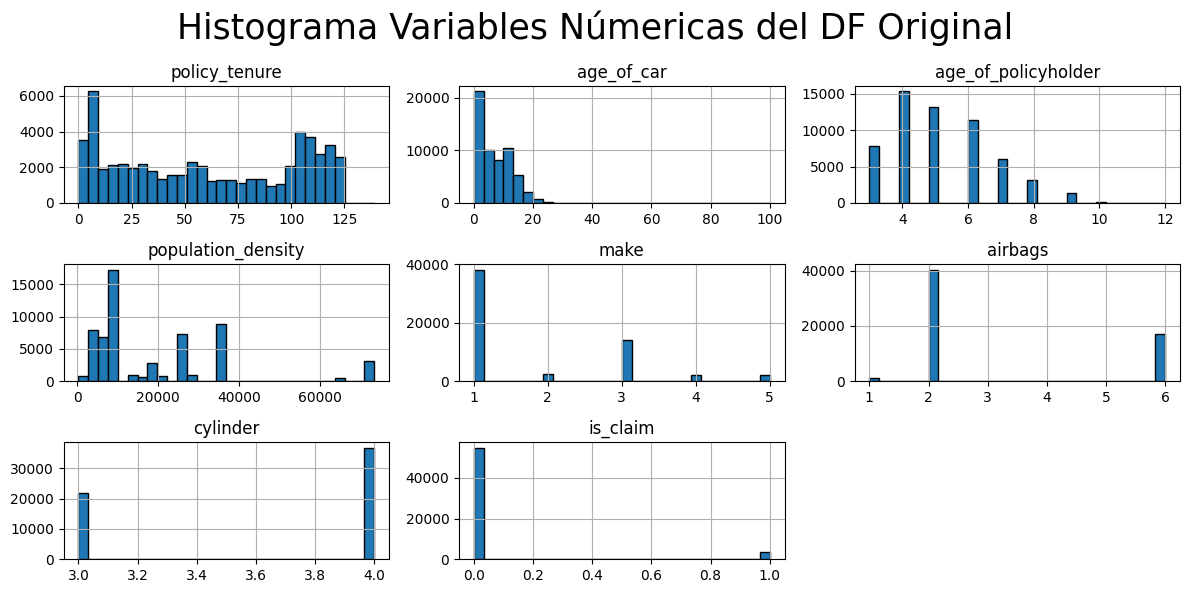

In [ ]:
df.hist(bins=30, edgecolor='black', figsize=(12,6))
plt.suptitle('Histograma Variables Númericas del DF Original', size=25)
plt.tight_layout()
plt.show()

**PARA VIZUALIZAR MEJOR LOS DATOS LIMPIAREMOS EL DF
ORIGINAL Y SELECCIONAREMOS POR RECLAMO Y NO RECLAMO**

Encontraremos los valores atípicos del DF para descartarlos

In [ ]:
def vatipicos(df, columna):
  Q1 = df[columna].quantile(0.25) # Percentil 25
  Q3 = df[columna].quantile(0.75) #Percentil 75
  IQR = Q3 - Q1

  limit_inferior = Q1 - 1.5 * IQR
  limit_superior = Q3 + 1.5 * IQR

  df = df[(df[columna] < limit_inferior) | (df[columna] > limit_superior)]
  return df

In [ ]:
#Extraer los valores atipicos de las columnas
columnas=['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'cylinder']

a_pt  =vatipicos(df, 'policy_tenure')
a_aoc =vatipicos(df, 'age_of_car')
a_aop =vatipicos(df, 'age_of_policyholder')
a_pd  =vatipicos(df, 'population_density')
a_m   =vatipicos(df, 'make')
a_a   =vatipicos(df, 'airbags')
a_c   =vatipicos(df, 'cylinder')


In [ ]:
#Convertir a un df atipico unico
df_atipicos=pd.concat([a_pt, a_aoc, a_aop, a_pd, a_m, a_a, a_c]).drop_duplicates()

In [ ]:
#Crear el DF sin atipicos
df_sin_atipicos=df.drop(df_atipicos.index)

In [ ]:
#Separar por Reclamos y No Reclamos
df_reclamo=df_sin_atipicos[df_sin_atipicos['is_claim']==1]
df_noreclamo=df_sin_atipicos[df_sin_atipicos['is_claim']==0]

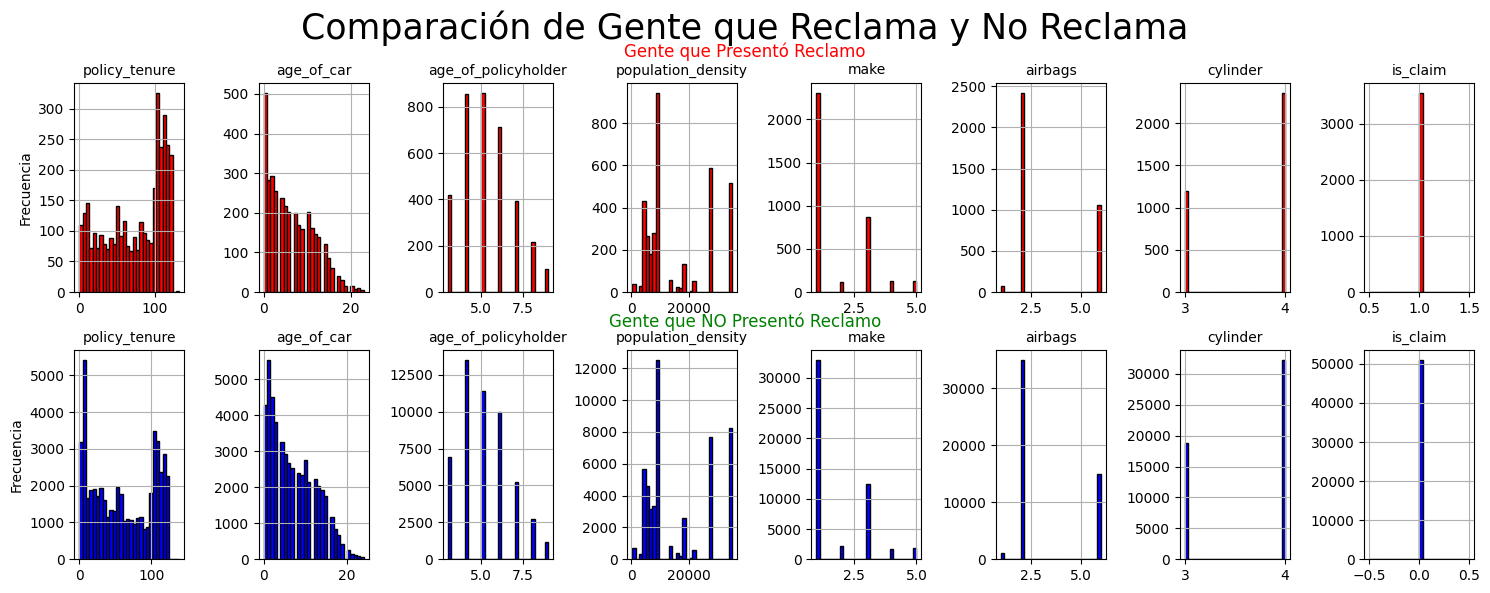

In [ ]:
#Agrupar ambos DF
fig, axes=plt.subplots(nrows=2, ncols=len(columnas)+1, figsize=(15,6))
df_reclamo.hist(bins=30, edgecolor='black', ax=axes[0], color='red')
axes[0,0].set_ylabel('Frecuencia')

df_noreclamo.hist(bins=30, edgecolor='black', ax=axes[1], color='blue')
axes[1,0].set_ylabel('Frecuencia')

fig.text(0.5, 0.91, 'Gente que Presentó Reclamo', ha='center', va='center', fontsize=12, color='red')
fig.text(0.5, 0.46, 'Gente que NO Presentó Reclamo', ha='center', va='center', fontsize=12, color='green')
#ajustamos el size del titulo
for ax_row in axes:
  for ax in ax_row:
    ax.title.set_size(10)

plt.suptitle('Comparación de Gente que Reclama y No Reclama', size=25)
plt.tight_layout() #eviata que se superpongan los elementos
plt.show()

a. ¿Cuáles son los principales patrones que podemos observar entre los asegurados que presentaron alguna reclamación y los que no presentaron?  Respuestas:

**policy_tenure**

*   La distribucion de Policy Tenure muestra que quienes presentaron reclamos(gráfico superior) tienen un rango de tenencia de poliza mas concentrado en los primeros años, mientras que aquellos sin reclamos(grafico inferior) presnetan un distribución extendida en el tiempo. Lo cal sugiere que los asegurados nuevos o con polizas recientes son más propensos a presentar reclamaciones.

**age_of_car**

*   La antiguedad de los autos es clarmanete más baja entre quienes no presentarón reclamos, lo cual tiende a estar mas distribuida, y se observan mas vehículos antiguos, lo qu eindica que a mayor natiguedad de estos, aumenta la probabilidad de presentar un reclamo.

**age_of_policyholder**


*   En ambas poblaciones, la mayoría de asegurados se encuentran en edades medias, alrededor de los 40-60 años.Sin embargo los que han presentado reclamos, tiene un leve tendencia de agruparse a la parte superior del rango de edad. Esto da entender que las personas de mayor edad presentan un ligero aumento en la probabilidad de hacer un reclamo.

**population_density**
*   Los asegurados que viven en áreas de mayor densidad poblacional(en especial urbanas), tienen mas tendencia a presentar reclamos,lo cual es visible en la mayor frecuencia en el rango de 0 a 20,000. Esto traduce a que pude haber un mayor riesgo de accidentes en zonas de tráfico elevado.

**make (fabricante)**
*   En la comparación por fabricante, se nota qu elos que hicieron reclamos; tienen una mayor representacion en ciertos fabricantes(algunos valores especificos de make). Esto recomienda que algunos modelos o marcas podrían tener caracteristicas que afectan el riesgo o que ciertos modelos son mas propensos a ser asegurados por personas que tienden a presentar reclamos

**airbags**
*   Hay una marcada diferencia en la cantidad de bolsas de aire entre ambos grupos. Los asegurados que no han presentado reclamos(grafico inferior) parecen estar mas concentrados en vehiculos con mas cantidad de bolsas de aire; mientras que quienes presentan reclamos, tiene una mayor frecuencia en vehiculos con menos bolsas de aire. Esto indica que los vehiculos con menos medidas de seguridad estan más asociados a reclamos.

**cylinder**
*   Para los cilindros, se observa que en ambos grupos la mayoría de los vehículos tienen entre 3 y 4 cilindros. Sin embargo; no parece haber una diferencia notable en la distribución de esta variable, entre los que si y no hicieron un reclamo.


b. ¿Cómo se asocian las características del vehículo como la antigüedad, transmisión automática, bolsas de aire, cilindros en la probabilidad de presentar un claim?

(Presentar visualizaciones)


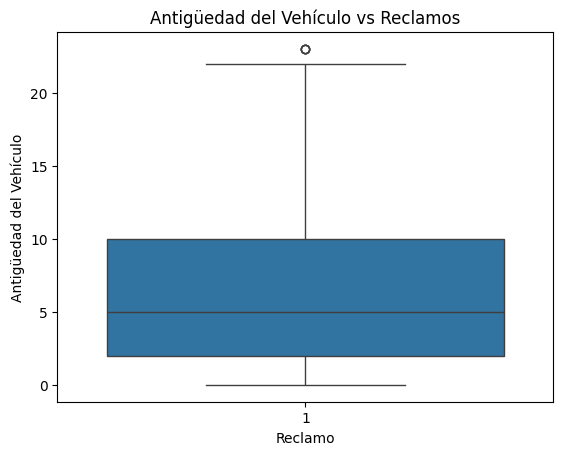

In [ ]:
# Antiguedad
sns.boxplot(x='is_claim', y='age_of_car', data=df_reclamo)
plt.title('Antigüedad del Vehículo vs Reclamos')
plt.xlabel('Reclamo')
plt.ylabel('Antigüedad del Vehículo')
plt.show()

La antiguedad del vehículo, no tiene por si solo, una asociacion muy fuerte con la probabilidad de reclamar. También se vizualiza outliers fuera de la caja; sin embargo, son pocos en comparación con el resto, la mayoria de los datos está entre 0 y 10, teniendo como mediana el 5.

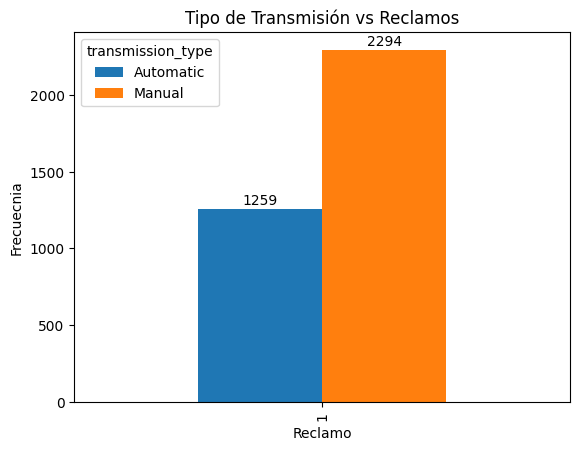

In [ ]:
# Transmisión autómatica
ax=df_reclamo.groupby(['is_claim', 'transmission_type']).size().unstack().plot(kind='bar')
plt.title('Tipo de Transmisión vs Reclamos')
plt.xlabel('Reclamo')
plt.ylabel('Frecuecnia')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1)
plt.show()

Puedo observar que los que presentan mas reclamos, tienen carros con trasmision manual, lo cual indica que este tipo de vehiculos, presentan fallas más a menudo qu elos automaticos.

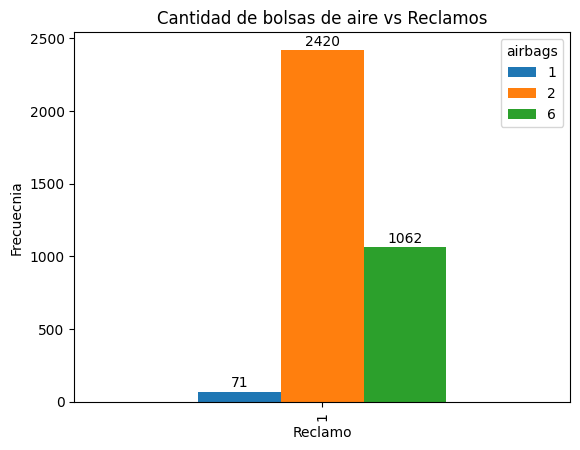

In [ ]:
# Bolsas de aire
ax=df_reclamo.groupby(['is_claim', 'airbags']).size().unstack().plot(kind='bar')
plt.title('Cantidad de bolsas de aire vs Reclamos')
plt.xlabel('Reclamo')
plt.ylabel('Frecuecnia')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1)
plt.show()

Se observa qu ela mayor cantidad de reclamos por la variable de bolsas de aire, provienen de los vehiculos que tienen:
*   2 bolsas de aire con 2420
*   6 bolsas de aire con 1062

Esto indica que los vehiculos defectuosos, suelen tener entre 2 y 6 bolsas de aire, y estar relacionado con otra variable, como la edad del carro u otra.

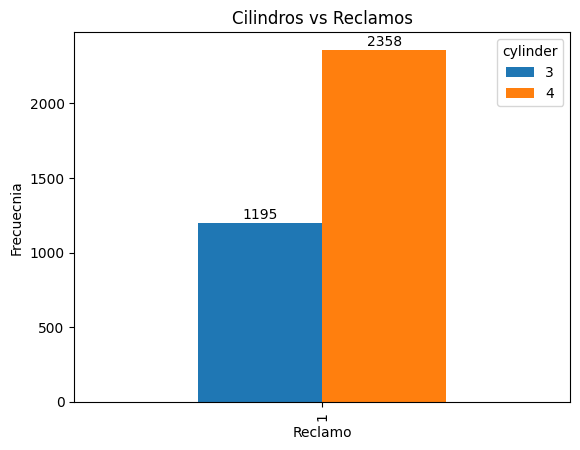

In [ ]:
# Cilindros
ax=df_reclamo.groupby(['is_claim', 'cylinder']).size().unstack().plot(kind='bar')
plt.title('Cilindros vs Reclamos')
plt.xlabel('Reclamo')
plt.ylabel('Frecuecnia')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1)
plt.show()

Como se puede ver, la cantidad de cilindros tiene que ver con los reclamos y usualmente se presnetan en carros de 3 y 4 cilindros, pero con mayor frecuencia en los de 4.